In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
df = pd.read_csv('Clean_data.csv')

In [2]:
df.head()

,Unnamed: 0,Year,Brand,Model_Tier,Network_Type,Dual_Sim,Has5G,Battery_mAh,ScreenSize_in,RAM_GB,Storage_GB,Camera_MP,Weight_g,CPU_GHz,Resolution_MP,Price_Class
0,0,2019,Oppo,Flagship,4g,yes,no,3332.84,6.46,8.0,256.0,64.0,241.78,2.83,5.53,2
1,1,2023,Nokia,Flagship,5g,yes,yes,4681.00,6.74,12.0,256.0,48.0,259.00,2.96,5.87,3
2,2,2016,Samsung,Budget,4g,yes,no,3332.84,5.09,4.0,64.0,8.0,221.00,1.56,2.39,0
3,3,2023,Oneplus,Midrange,5g,no,yes,3650.00,6.45,8.0,128.0,48.0,215.00,2.32,4.72,3
4,4,2024,Motorola,Midrange,5g,no,yes,4388.00,6.81,8.0,256.0,48.0,242.00,2.96,5.28,3


RQ1) What is the distribution of model tier by each brand. By Fırat Haşhaş

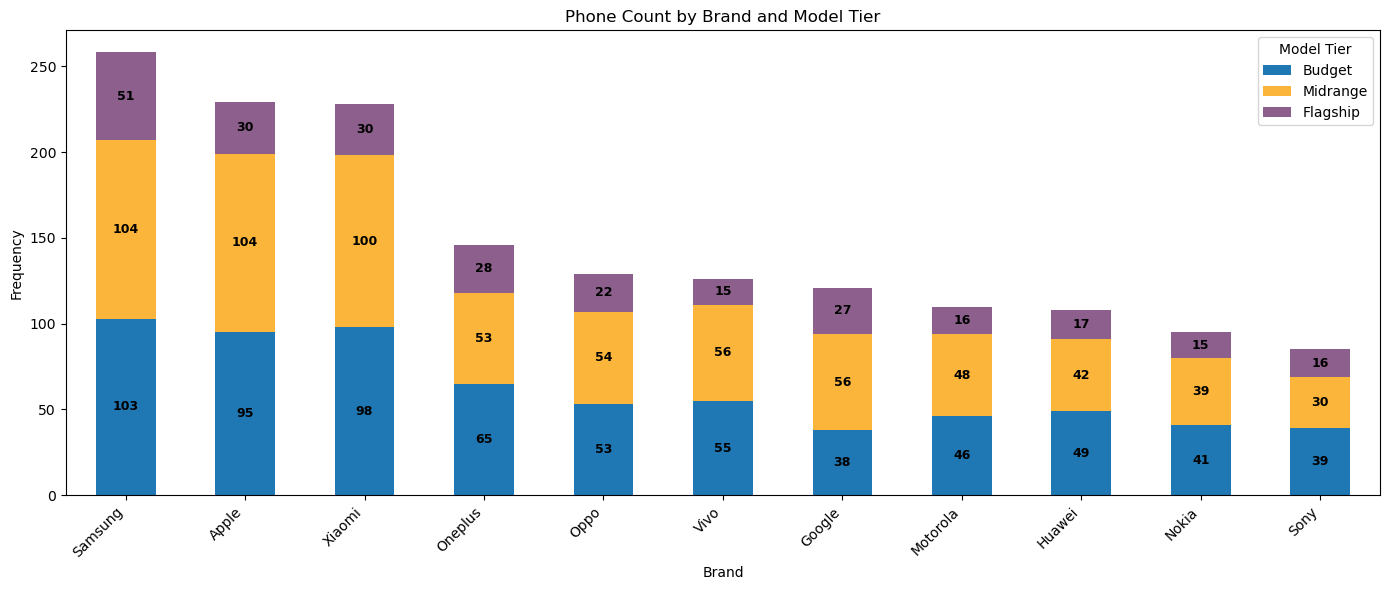

In [3]:
# Create a stacked bar chart by Brand and Model_Tier frequency
brand_tier = df.groupby(['Brand', 'Model_Tier']).size().unstack(fill_value=0)
brand_tier = brand_tier[['Budget', 'Midrange', 'Flagship']]

# Sort by total frequency in descending order
brand_tier = brand_tier.loc[brand_tier.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(14, 6))
brand_tier.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#1f77b4', '#FCB53B', '#8D5F8C']
)

# Add data labels on each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, weight='bold')

ax.set_title('Phone Count by Brand and Model Tier')
ax.set_xlabel('Brand')
ax.set_ylabel('Frequency')
ax.legend(title='Model Tier', labels=['Budget', 'Midrange', 'Flagship'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

RQ2) How average storage capacity changes by price class? By Ravza Nur Erkal

In [5]:
# Plotting average Storage_GB by Price_Class
df_plot = df[["Price_Class", "Storage_GB"]].copy()
df_plot["Price_Label"] = df_plot["Price_Class"].map({
    0: "Low",
    1: "Mid-Low",
    2: "Mid-High",
    3: "High"
})
color_map = {
    "Low": "#1f77b4",
    "Mid-Low": "#1f77b4",
    "Mid-High": "#1f77b4",
    "High": "#1f77b4"
}
# Calculate mean Storage_GB for each Price_Label
mean_storage = (
    df_plot
    .groupby("Price_Label", as_index=False)
    .mean()
)
# Define the order of categories
order = ["Low", "Mid-Low", "Mid-High", "High"]
fig = px.bar(
    mean_storage,
    x="Price_Label",
    y="Storage_GB",
    category_orders={"Price_Label": order},
    title="Average Storage Capacity by Price Class",
    labels={
        "Price_Label": "Price Class (Low → High)",
        "Storage_GB": "Average Storage (GB)"
    },
    color="Price_Label",
    color_discrete_map=color_map
)

fig.update_layout(
    width=700,
    height=500,
    showlegend=False,
        plot_bgcolor='white',

    yaxis_showgrid=True,

    yaxis_gridwidth=1,

    yaxis_gridcolor='lightgray'               
)
pio.renderers.default = "notebook_connected"								
fig.show()

RQ3) How does average camera resolution evolve over time for the top three smartphone brands? By Su Eda Çelik

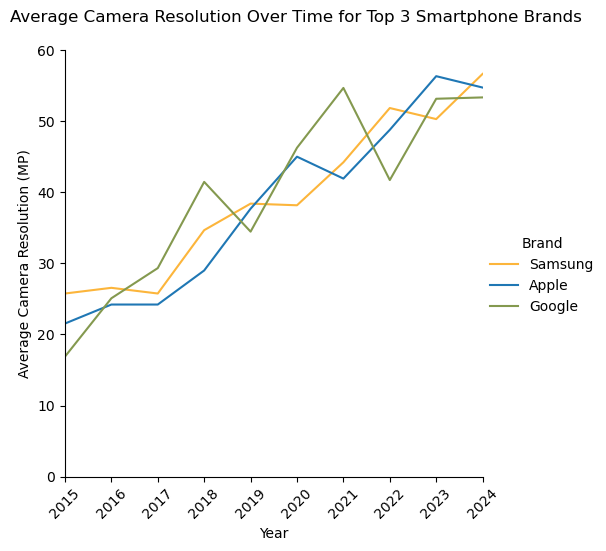

In [ ]:
# Line plot of Camera_MP over Years for top 3 Brands
top_brands = (df.groupby("Brand")["Camera_MP"].mean().sort_values(ascending=False).head(3).index)
df_top3 = df[df["Brand"].isin(top_brands)]

chart = sns.relplot(
    data=df_top3,
    x="Year",
    y="Camera_MP",
    hue="Brand",
    kind="line",
    estimator="mean",
    errorbar=None,
    palette={"Samsung": "#FCB53B", "Apple": "#1f77b4", "Google": "#84994F"}
)
type(chart) #FacetGrid

chart.fig.suptitle("Average Camera Resolution Over Time for Top 3 Smartphone Brands", y=1.05)
chart.set_axis_labels("Year", "Average Camera Resolution (MP)")

axis = chart.axes[0, 0]   # one axis
axis.set_yticks([0, 10, 20, 30, 40, 50, 60]) #adding 60 to x-axis
axis.set_xticks(sorted(df_top3["Year"].unique())) #showing all the years
axis.tick_params(axis="x", rotation=45) #rotating for easier readability
axis.grid(False)  #removing the line in the background
axis.margins(x=0) #starts from 0

plt.show()




RQ4) Which brands has 5g technologies according to their price classes? By Berfin Şimşek

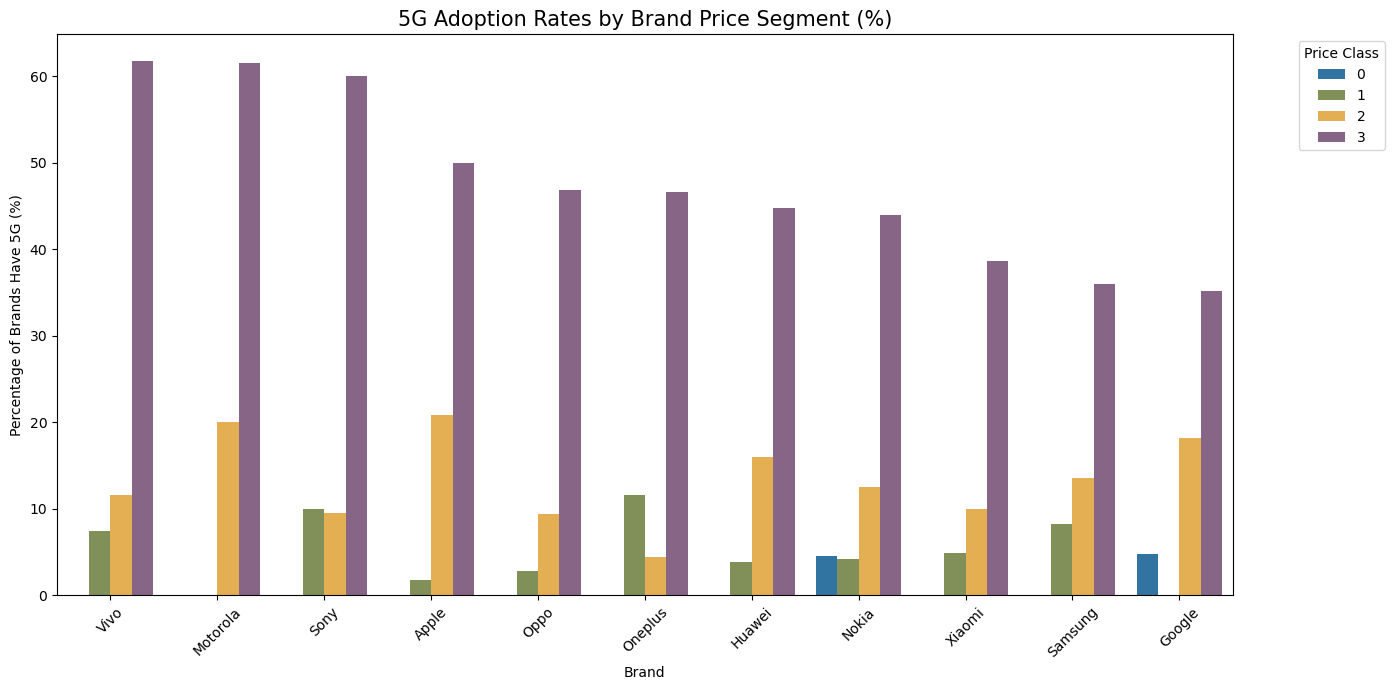

In [ ]:

# Analyzing 5G adoption by Brand and Price_Class
df["5G_score"]= df['Has5G'].map({'yes': 1, 'no': 0})
analyze_5g=df.groupby(['Brand', 'Price_Class'])['5G_score'].mean().sort_values(ascending=False).reset_index()
analyze_5g['5g_percentage'] = analyze_5g['5G_score'] * 100

plt.figure(figsize=(14, 7))
sns.barplot(data=analyze_5g, x='Brand', y='5g_percentage', hue='Price_Class', palette=["#1f77b4", "#84994F", "#FCB53B", "#8D5F8C"])
plt.title('5G Adoption Rates by Brand Price Segment (%)', fontsize=15)

plt.ylabel('Percentage of Brands Have 5G (%)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.legend(title='Price Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

RQ5) What is the correlation between model tiers and CPU performance? By Cem Özcan

/var/folders/f5/khd1v3ds6s7fh5jxfzsw4y9h0000gn/T/ipykernel_7117/964661066.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




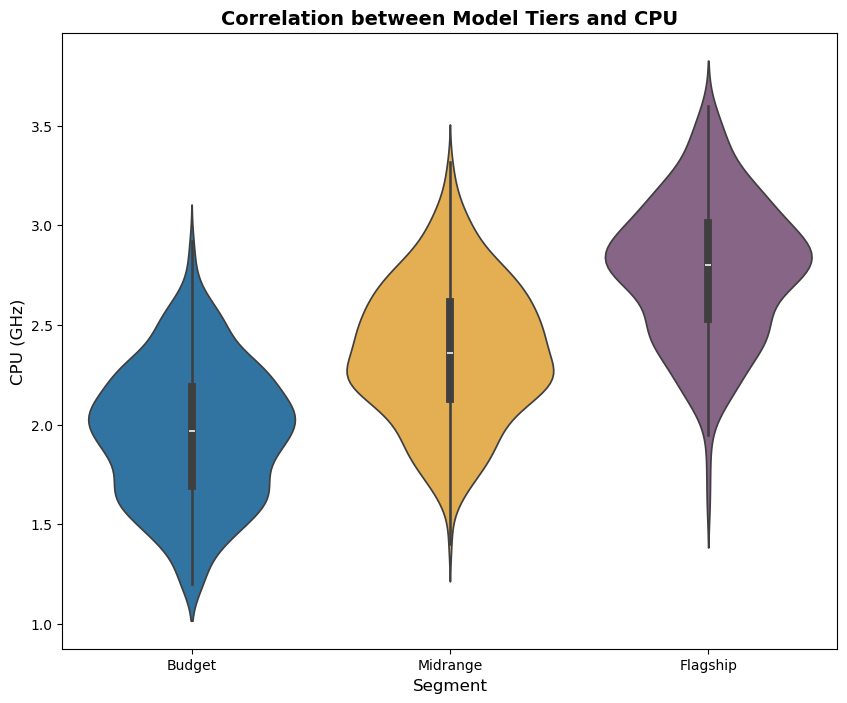

In [7]:
plt.figure(figsize=(10, 8))
plt.title('Correlation between Model Tiers and CPU', fontsize=14, fontweight='bold')

tier_order = ['Budget', 'Midrange', 'Flagship']
tier_colors = ["#1f77b4", "#FCB53B", "#8D5F8C"]

# CPU distribution
sns.violinplot(data=df, x='Model_Tier', y='CPU_GHz', order=tier_order, palette=tier_colors)
plt.ylabel('CPU (GHz)', fontsize=12)
plt.xlabel('Segment', fontsize=12)

plt.show()